### Contents
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
    Family vs Happiness
    GDP vs GVT corruption
    Health and happiness
   

### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Creating Path
path = r'/Users/gwynreniers/Documents/World Happiness Report'
path

'/Users/gwynreniers/Documents/World Happiness Report'

In [6]:
df = pd.read_csv(os.path.join(path,'world Happiness Report Continents.csv'),
                      index_col = False)

### Data Cleaning

In [41]:
df.head(14)

,Unnamed: 0.1,Unnamed: 0,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Total_views,Continent
0,15,15,2015,Brazil,16,6.983,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,111,South America
1,22,22,2015,Venezuela,23,6.810,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,353,South America
2,26,26,2015,Chile,27,6.670,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,121,South America
3,29,29,2015,Argentina,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,138,South America
4,31,31,2015,Uruguay,32,6.485,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,151,South America
5,32,32,2015,Colombia,33,6.477,0.91861,1.24018,0.69077,0.53466,0.05120,0.18401,174,South America
6,39,39,2015,Suriname,40,6.269,0.99534,0.97200,0.60820,0.59657,0.13633,0.16991,80,South America
7,47,47,2015,Ecuador,48,5.975,0.86402,0.99903,0.79075,0.48574,0.18090,0.11541,239,South America
8,50,50,2015,Bolivia,51,5.890,0.68133,0.97841,0.53920,0.57414,0.08800,0.20536,292,South America
9,52,52,2015,Paraguay,53,5.878,0.75985,1.30477,0.66098,0.53899,0.08242,0.34240,321,South America


In [8]:
df.shape

(52, 14)

In [9]:
# Check for missing values
df.isnull().sum()

Unnamed: 0.1                     0
Unnamed: 0                       0
Year                             0
Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Total_views                      0
Continent                        0
dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

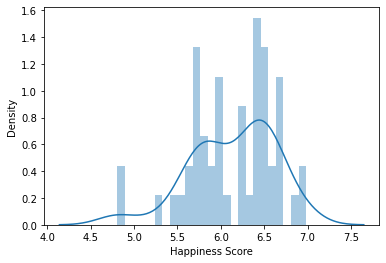

In [11]:
# Check for extreme values
sns.distplot(df['Happiness Score'],bins = 25, kde = True)

In [12]:
# Check Mean
df['Happiness Score'].mean()

6.138076924250677

In [14]:
# Check median
df['Happiness Score'].median()

6.2645

In [15]:
# Check max
df['Happiness Score'].max()

6.983

In [16]:
# Check min
df['Happiness Score'].min()

4.806

In [17]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Total_views
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,347.903846,43.134615,2016.942308,44.134615,6.138077,0.999665,1.242426,0.671497,0.475292,0.093818,0.152642,216.057692
std,229.603858,20.394183,1.433677,20.394183,0.487803,0.132660,0.210205,0.093837,0.115297,0.049717,0.071586,91.513079
min,15.000000,15.000000,2015.000000,16.000000,4.806000,0.681330,0.778660,0.469700,0.133000,0.034000,0.042500,80.000000
25%,182.500000,27.000000,2016.000000,28.000000,5.804500,0.914005,1.059435,0.615000,0.431000,0.054000,0.109782,138.000000
50%,346.000000,37.500000,2017.000000,38.500000,6.264500,0.996010,1.252480,0.674500,0.493000,0.079874,0.145505,174.000000
75%,531.500000,58.750000,2018.000000,59.750000,6.478000,1.093965,1.439000,0.736000,0.546910,0.121730,0.181422,315.000000
max,727.000000,101.000000,2019.000000,102.000000,6.983000,1.252785,1.522000,0.858570,0.625000,0.245580,0.342400,353.000000


### Data prep for regression analysis

#### Hypothesis 1: If a country has a higher family score, it will have a higher happiness score.

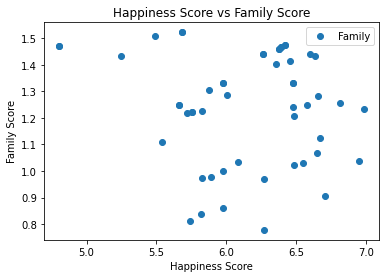

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Happiness Score', y='Family',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness Score vs Family Score')  
plt.xlabel('Happiness Score')  
plt.ylabel('Family Score')  
plt.show()

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Happiness Score'].values.reshape(-1,1)
y = df['Family'].values.reshape(-1,1)

In [21]:
X

array([[6.983     ],
       [6.81      ],
       [6.67      ],
       [6.574     ],
       [6.485     ],
       [6.477     ],
       [6.269     ],
       [5.975     ],
       [5.89      ],
       [5.878     ],
       [5.824     ],
       [6.952     ],
       [6.705     ],
       [6.65      ],
       [6.545     ],
       [6.481     ],
       [6.269     ],
       [6.084     ],
       [5.976     ],
       [5.822     ],
       [5.743     ],
       [5.538     ],
       [6.65199995],
       [6.63500023],
       [6.59899998],
       [6.454     ],
       [6.35699987],
       [6.0079999 ],
       [5.82299995],
       [5.71500015],
       [5.49300003],
       [5.25      ],
       [6.476     ],
       [6.419     ],
       [6.388     ],
       [6.379     ],
       [6.26      ],
       [5.973     ],
       [5.752     ],
       [5.681     ],
       [5.663     ],
       [4.806     ],
       [6.476     ],
       [6.419     ],
       [6.388     ],
       [6.379     ],
       [6.26      ],
       [5.973

In [22]:
y

array([[1.23287   ],
       [1.25596   ],
       [1.12447   ],
       [1.24823   ],
       [1.2089    ],
       [1.24018   ],
       [0.972     ],
       [0.99903   ],
       [0.97841   ],
       [1.30477   ],
       [0.97459   ],
       [1.03938   ],
       [0.90587   ],
       [1.06612   ],
       [1.03143   ],
       [1.02169   ],
       [0.77866   ],
       [1.03302   ],
       [0.85974   ],
       [0.83779   ],
       [0.81255   ],
       [1.11111   ],
       [1.28402495],
       [1.431306  ],
       [1.44045115],
       [1.41222787],
       [1.40218294],
       [1.28616881],
       [1.22761905],
       [1.21877038],
       [1.50728488],
       [1.43133759],
       [1.331     ],
       [1.474     ],
       [1.468     ],
       [1.459     ],
       [1.439     ],
       [1.33      ],
       [1.223     ],
       [1.522     ],
       [1.249     ],
       [1.469     ],
       [1.331     ],
       [1.474     ],
       [1.468     ],
       [1.459     ],
       [1.439     ],
       [1.33 

In [23]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

### 4. Regression Analysis

In [24]:
# Create regression object
regression = LinearRegression()

In [25]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

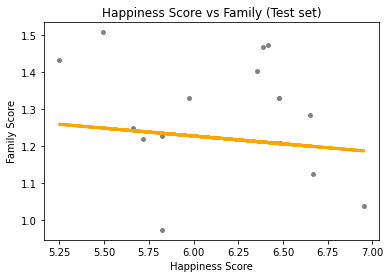

In [31]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='Orange', linewidth =3)
plot_test.title('Happiness Score vs Family (Test set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Family Score')
plot_test.show()

#### The line does not fit the data very well.  This can be seen by the distance of the data points to the line. Indicating we do not have a linear relationship between the variables.

In [28]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [29]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.04213878]]
Mean squared error:  0.025715940373819607
R2 score:  -0.15209406096269373


In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.227619,1.235150
1,1.330000,1.228830
2,1.039380,1.187576
3,1.468000,1.211342
4,1.124470,1.199459
5,1.507285,1.249056
6,1.249000,1.241893
7,1.331000,1.207634
8,1.402183,1.212648
9,1.208900,1.207255


 #### The line does not fit the data very well.  This can be seen by the distance of the data points to the line. Indicating we do not have a linear relationship between the variables.

In [32]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.04213878]]
Mean squared error:  0.025715940373819607
R2 score:  -0.15209406096269373


In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.227619,1.235150
1,1.330000,1.228830
2,1.039380,1.187576
3,1.468000,1.211342
4,1.124470,1.199459
5,1.507285,1.249056
6,1.249000,1.241893
7,1.331000,1.207634
8,1.402183,1.212648
9,1.208900,1.207255


#### The summary statistics of the model confirm that the model is inaccurate.  Which can also be seen by the variance in the actual vs prdicted values.  An R2 score of -0.15  indicates a very poor fit even though I have a small MSE.  The slope of -0.04 shows that as family score increases happiness score drops. So family is not as strong as predictor in happiness in South America as I thought.

### Compare how the regression fits the training set

In [35]:
# Predict on the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [36]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.04213878]]
Mean squared error:  0.05094524046192909
R2 score:  0.008208793517918367


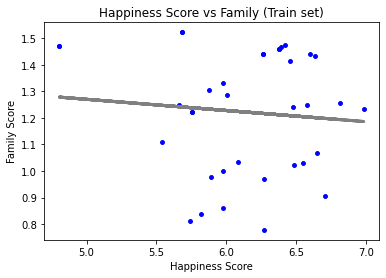

In [38]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='gray', linewidth =3)
plot_test.title('Happiness Score vs Family (Train set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Family Score')
plot_test.show()

#### The models outcome on the training set is very similar to that on the test set.  Although the MSE was a little larger on this set.  This confirming that this is not a good model to use.  This disproves my orgional idea that a higher family score will increase happines score.

### Regression on df on GDP and Happiness

In [91]:
df2 = df['Economy (GDP per Capita)']
df2

0     0.981240
1     1.044240
2     1.107150
3     1.053510
4     1.061660
5     0.918610
6     0.995340
7     0.864020
8     0.681330
9     0.759850
10    0.900190
11    1.087540
12    1.216700
13    1.151370
14    1.181570
15    1.030320
16    1.096860
17    1.133670
18    0.973060
19    0.794220
20    0.996020
21    0.893730
22    1.252785
23    1.107353
24    1.185295
25    1.217560
26    1.070622
27    1.000820
28    0.833757
29    1.035225
30    0.932537
31    1.128431
32    1.131000
33    0.986000
34    1.073000
35    1.093000
36    0.960000
37    0.889000
38    0.751000
39    0.835000
40    0.934000
41    0.996000
42    1.131000
43    0.986000
44    1.073000
45    1.093000
46    0.960000
47    0.889000
48    0.751000
49    0.835000
50    0.934000
51    0.996000
Name: Economy (GDP per Capita), dtype: float64

In [92]:
df2.describe()

count    52.000000
mean      0.999665
std       0.132660
min       0.681330
25%       0.914005
50%       0.996010
75%       1.093965
max       1.252785
Name: Economy (GDP per Capita), dtype: float64

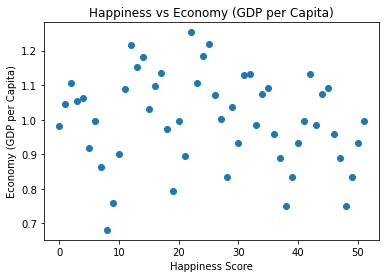

In [96]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'Happiness Score', y='Economy (GDP per Capita)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness vs Economy (GDP per Capita)')  
plt.xlabel('Happiness Score')  
plt.ylabel('Economy (GDP per Capita)')  
plt.show()

In [97]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df2['Happiness Score'].values.reshape(-1,1)
y = df2['Economy (GDP per Capita)'].values.reshape(-1,1)

KeyError: 'Happiness Score'

In [98]:
X

array([[6.983     ],
       [6.81      ],
       [6.67      ],
       [6.574     ],
       [6.485     ],
       [6.477     ],
       [6.269     ],
       [5.975     ],
       [5.89      ],
       [5.878     ],
       [5.824     ],
       [6.952     ],
       [6.705     ],
       [6.65      ],
       [6.545     ],
       [6.481     ],
       [6.269     ],
       [6.084     ],
       [5.976     ],
       [5.822     ],
       [5.743     ],
       [5.538     ],
       [6.65199995],
       [6.63500023],
       [6.59899998],
       [6.454     ],
       [6.35699987],
       [6.0079999 ],
       [5.82299995],
       [5.71500015],
       [5.49300003],
       [5.25      ],
       [6.476     ],
       [6.419     ],
       [6.388     ],
       [6.379     ],
       [6.26      ],
       [5.973     ],
       [5.752     ],
       [5.681     ],
       [5.663     ],
       [4.806     ],
       [6.476     ],
       [6.419     ],
       [6.388     ],
       [6.379     ],
       [6.26      ],
       [5.973

In [99]:
y

array([[0.69702   ],
       [0.72052   ],
       [0.85857   ],
       [0.78723   ],
       [0.8116    ],
       [0.69077   ],
       [0.6082    ],
       [0.79075   ],
       [0.5392    ],
       [0.66098   ],
       [0.73017   ],
       [0.61415   ],
       [0.81883   ],
       [0.69711   ],
       [0.72183   ],
       [0.59659   ],
       [0.50933   ],
       [0.61904   ],
       [0.68613   ],
       [0.4697    ],
       [0.62994   ],
       [0.58295   ],
       [0.8194797 ],
       [0.61655235],
       [0.69513708],
       [0.71921682],
       [0.59502792],
       [0.68563622],
       [0.47363025],
       [0.63016611],
       [0.57925069],
       [0.61714423],
       [0.808     ],
       [0.675     ],
       [0.744     ],
       [0.771     ],
       [0.635     ],
       [0.736     ],
       [0.508     ],
       [0.615     ],
       [0.674     ],
       [0.657     ],
       [0.808     ],
       [0.675     ],
       [0.744     ],
       [0.771     ],
       [0.635     ],
       [0.736

In [100]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [101]:
### 4. Regression Analysis

# Create regression object
regression = LinearRegression()

In [102]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [103]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

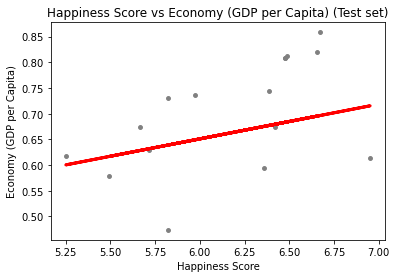

In [104]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Economy (GDP per Capita) (Test set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Economy (GDP per Capita)')
plot_test.show()

In [105]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [106]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.06762482]]
Mean squared error:  0.009839997882529383
R2 score:  0.10828625508274592


### This is what I expected, since many people in South America are not wealthy, as the GDP goes down, happiness increases. This is why I suspected (incorrectly) family to have a greater imapct on happiness in South America. This begs the question, what then is the biggest factor that influences happiness in South America if it is not GDP or Family?

### Hypothesis 2: Health plays a larger fctor in happiness than GDP or Family

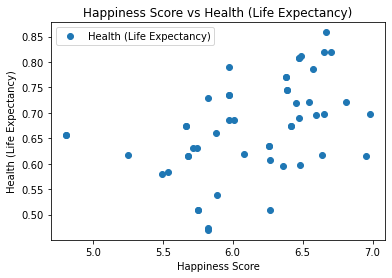

In [107]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Happiness Score', y='Health (Life Expectancy)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness Score vs Health (Life Expectancy)')  
plt.xlabel('Happiness Score')  
plt.ylabel('Health (Life Expectancy)')  
plt.show()

In [108]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Happiness Score'].values.reshape(-1,1)
y = df['Health (Life Expectancy)'].values.reshape(-1,1)

In [109]:
X

array([[6.983     ],
       [6.81      ],
       [6.67      ],
       [6.574     ],
       [6.485     ],
       [6.477     ],
       [6.269     ],
       [5.975     ],
       [5.89      ],
       [5.878     ],
       [5.824     ],
       [6.952     ],
       [6.705     ],
       [6.65      ],
       [6.545     ],
       [6.481     ],
       [6.269     ],
       [6.084     ],
       [5.976     ],
       [5.822     ],
       [5.743     ],
       [5.538     ],
       [6.65199995],
       [6.63500023],
       [6.59899998],
       [6.454     ],
       [6.35699987],
       [6.0079999 ],
       [5.82299995],
       [5.71500015],
       [5.49300003],
       [5.25      ],
       [6.476     ],
       [6.419     ],
       [6.388     ],
       [6.379     ],
       [6.26      ],
       [5.973     ],
       [5.752     ],
       [5.681     ],
       [5.663     ],
       [4.806     ],
       [6.476     ],
       [6.419     ],
       [6.388     ],
       [6.379     ],
       [6.26      ],
       [5.973

In [110]:
y

array([[0.69702   ],
       [0.72052   ],
       [0.85857   ],
       [0.78723   ],
       [0.8116    ],
       [0.69077   ],
       [0.6082    ],
       [0.79075   ],
       [0.5392    ],
       [0.66098   ],
       [0.73017   ],
       [0.61415   ],
       [0.81883   ],
       [0.69711   ],
       [0.72183   ],
       [0.59659   ],
       [0.50933   ],
       [0.61904   ],
       [0.68613   ],
       [0.4697    ],
       [0.62994   ],
       [0.58295   ],
       [0.8194797 ],
       [0.61655235],
       [0.69513708],
       [0.71921682],
       [0.59502792],
       [0.68563622],
       [0.47363025],
       [0.63016611],
       [0.57925069],
       [0.61714423],
       [0.808     ],
       [0.675     ],
       [0.744     ],
       [0.771     ],
       [0.635     ],
       [0.736     ],
       [0.508     ],
       [0.615     ],
       [0.674     ],
       [0.657     ],
       [0.808     ],
       [0.675     ],
       [0.744     ],
       [0.771     ],
       [0.635     ],
       [0.736

In [111]:
# Split data into a training set and a test set.  Using test_train_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =0)

#### Regression Analysis

In [112]:
regression.fit(X_train, y_train)

LinearRegression()

In [113]:
y_predicted = regression.predict(X_test)

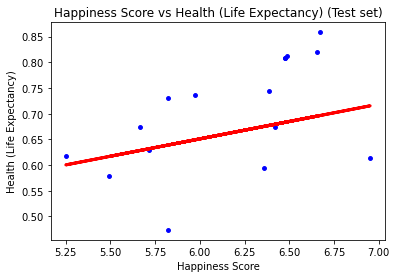

In [114]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Health (Life Expectancy) (Test set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Health (Life Expectancy)')
plot_test.show()

In [115]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [116]:
# Check summary stats
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.06762482]]
Mean squared error:  0.009839997882529383
R2 score:  0.10828625508274592


In [117]:
# Create a dataframe comparing the actual and predicted values of y.

data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.227619,1.235150
1,1.330000,1.228830
2,1.039380,1.187576
3,1.468000,1.211342
4,1.124470,1.199459
5,1.507285,1.249056
6,1.249000,1.241893
7,1.331000,1.207634
8,1.402183,1.212648
9,1.208900,1.207255


### I think we found it!! Health is a determining marker of happiness!! This makes sense as many people are manual laborers and must be in good health to provide for their families. The MSE is small, and the slope is postive 0.1 indidcating a positive correlation between health and happiness.

### What about trust in government?

In [118]:
df3=df['Trust (Government Corruption)']

In [119]:
df3

0     0.175210
1     0.110690
2     0.128690
3     0.084840
4     0.245580
5     0.051200
6     0.136330
7     0.180900
8     0.088000
9     0.082420
10    0.059890
11    0.141660
12    0.114510
13    0.072960
14    0.213940
15    0.053990
16    0.126920
17    0.083040
18    0.180370
19    0.077460
20    0.052920
21    0.073960
22    0.082288
23    0.111093
24    0.059740
25    0.178062
26    0.046669
27    0.140135
28    0.060478
29    0.047049
30    0.091066
31    0.064491
32    0.061000
33    0.088000
34    0.054000
35    0.155000
36    0.039000
37    0.120000
38    0.054000
39    0.074000
40    0.034000
41    0.052000
42    0.061000
43    0.088000
44    0.054000
45    0.155000
46    0.039000
47    0.120000
48    0.054000
49    0.074000
50    0.034000
51    0.052000
Name: Trust (Government Corruption), dtype: float64

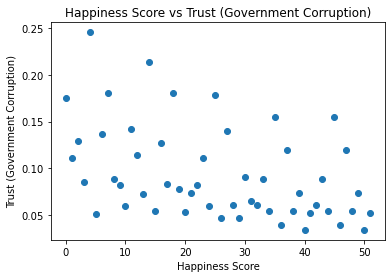

In [125]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df3.plot(x = 'Happiness Score', y='Trust (Government Corruption)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness Score vs Trust (Government Corruption)')  
plt.xlabel('Happiness Score')  
plt.ylabel('Trust (Government Corruption)')  
plt.show()

In [128]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Happiness Score'].values.reshape(-1,1)
y = df['Trust (Government Corruption)'].values.reshape(-1,1)

In [129]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [131]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [132]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

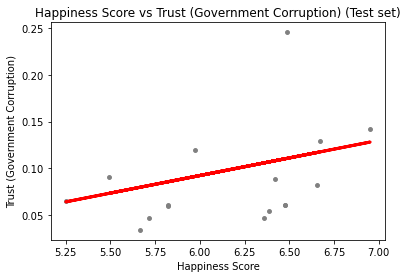

In [134]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Trust (Government Corruption) (Test set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Trust (Government Corruption)')
plot_test.show()

In [135]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03761894]]
Mean squared error:  0.0023102088558774186
R2 score:  0.10754259573202607


### There is a postive relationship between the happiness score and the trust in government in South America. The MSE is small, and the R2 is 0.1 so this means it is a good model for this prediction.